Please upload your CSV file:


Saving enhanced_synthetic_regression_data.csv to enhanced_synthetic_regression_data (2).csv


,Years_of_Experience,Age,Education_Level,City_Tier,Work_Hours_Per_Week,Certifications_Count,Remote_Work_Ratio,Industry_Experience,Annual_Bonus,Salary
0,17.482721,40,3,3,26,4,0.854010,6.310669,8292.550842,65872.295252
1,1.498436,45,2,3,24,7,0.099493,23.780375,13889.447196,36487.408166
2,18.561721,55,1,1,31,6,0.189283,25.521682,12300.699395,55572.202879
3,4.667797,22,1,3,59,9,0.752599,23.633157,10542.710420,86448.169619
4,13.602343,40,1,2,59,2,0.927293,18.182214,16265.254788,110975.777188


,Variable,Coefficient,P-Value
const,Intercept,84972.878149,1.744475e-34
x1,Years_of_Experience,4718.462069,2.422545e-01
x2,Age,-2291.000644,5.519688e-01
x3,Education_Level,5746.921891,1.603229e-01
x4,City_Tier,-9139.343855,2.836103e-02
x5,Work_Hours_Per_Week,5846.760234,1.570807e-01
x6,Certifications_Count,-1153.303238,7.690204e-01
x7,Remote_Work_Ratio,6527.945748,9.875424e-02
x8,Industry_Experience,-1112.973326,7.758606e-01
x9,Annual_Bonus,-2840.296439,4.671536e-01


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.589
Date:                Sat, 08 Feb 2025   Prob (F-statistic):              0.135
Time:                        09:53:38   Log-Likelihood:                -940.23
No. Observations:                  80   AIC:                             1900.
Df Residuals:                      70   BIC:                             1924.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.497e+04   3676.552     23.112      0.0

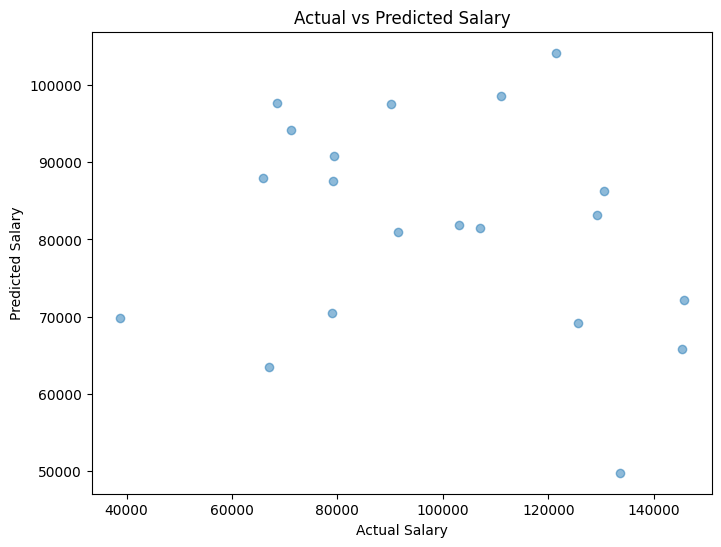

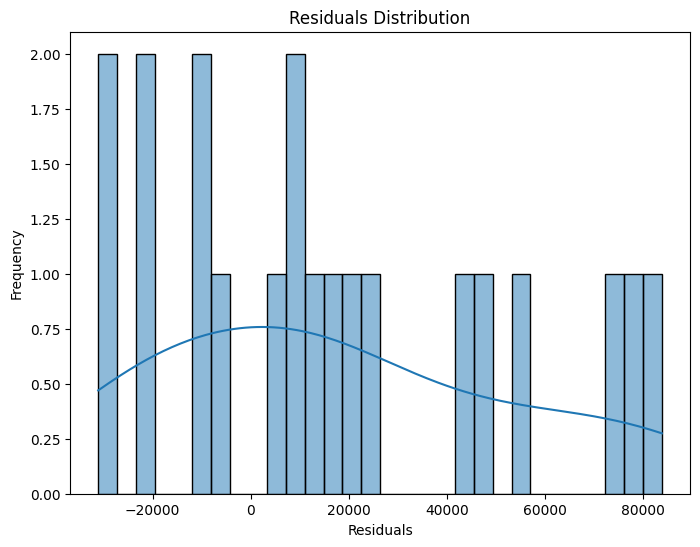

,Years_of_Experience,Age,Education_Level,City_Tier,Work_Hours_Per_Week,Certifications_Count,Remote_Work_Ratio,Industry_Experience,Annual_Bonus,Salary
0,17.482721,40,3,3,26,4,0.854010,6.310669,8292.550842,65872.295252
1,1.498436,45,2,3,24,7,0.099493,23.780375,13889.447196,36487.408166
2,18.561721,55,1,1,31,6,0.189283,25.521682,12300.699395,55572.202879
3,4.667797,22,1,3,59,9,0.752599,23.633157,10542.710420,86448.169619
4,13.602343,40,1,2,59,2,0.927293,18.182214,16265.254788,110975.777188


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------------------
# 1. Upload and Load the Dataset
# ------------------------------

from google.colab import files
print("Please upload your CSV file:")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Display first few rows
display(df.head())

# ------------------------------
# 2. Train-Test Split
# ------------------------------

X = df.drop(columns=['Salary'])  # Independent variables
y = df['Salary']  # Dependent variable

# Add constant for statsmodels regression
X_with_const = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=42)

# Standardize the numerical features (excluding constant)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:])  # Exclude constant
X_test_scaled = scaler.transform(X_test.iloc[:, 1:])

# Reattach constant column
X_train_scaled = np.column_stack((np.ones(X_train.shape[0]), X_train_scaled))
X_test_scaled = np.column_stack((np.ones(X_test.shape[0]), X_test_scaled))

# ------------------------------
# 3. Regression Model (Linear Regression using statsmodels)
# ------------------------------

# Train model
model = sm.OLS(y_train, X_train_scaled).fit()

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Create a DataFrame with variable names
regression_summary = pd.DataFrame({
    'Variable': ['Intercept'] + list(X.columns),
    'Coefficient': model.params,
    'P-Value': model.pvalues
})

# Display regression summary with variable names
display(regression_summary)

# ------------------------------
# 4. Regression Summary Table
# ------------------------------

print(model.summary())  # Display regression results (coefficients, p-values, R-squared, etc.)

# ------------------------------
# 5. Model Evaluation
# ------------------------------

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

# ------------------------------
# 6. Data Visualization
# ------------------------------

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Show processed data
display(df.head())


Please upload your time series CSV file:


Saving time_series_data.csv to time_series_data.csv


,Date,Sales,Ad_Spend,Website_Traffic,Store_Visitors,Holiday_Flag,Discount_Percentage,Competitor_Price_Index,Weather_Impact,Economic_Index
0,2019-01-01,18708.082266,10840.893932,5625,244,0,5,1.126631,-1.417261,106.062535
1,2019-01-02,42443.004912,5046.856166,8510,3249,0,5,0.805544,-0.583564,93.981060
2,2019-01-03,34878.657969,7676.715051,6240,2581,1,20,0.928987,-0.629330,91.509515
3,2019-01-04,7545.349500,3576.804246,7429,4876,0,10,1.085589,2.987959,103.054023
4,2019-01-05,31984.964392,5599.898784,6805,2963,0,0,1.042384,-3.361583,97.531615


<ipython-input-6-aec7db250c4e>:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()
<ipython-input-6-aec7db250c4e>:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df['Sales'].resample('Y').sum()


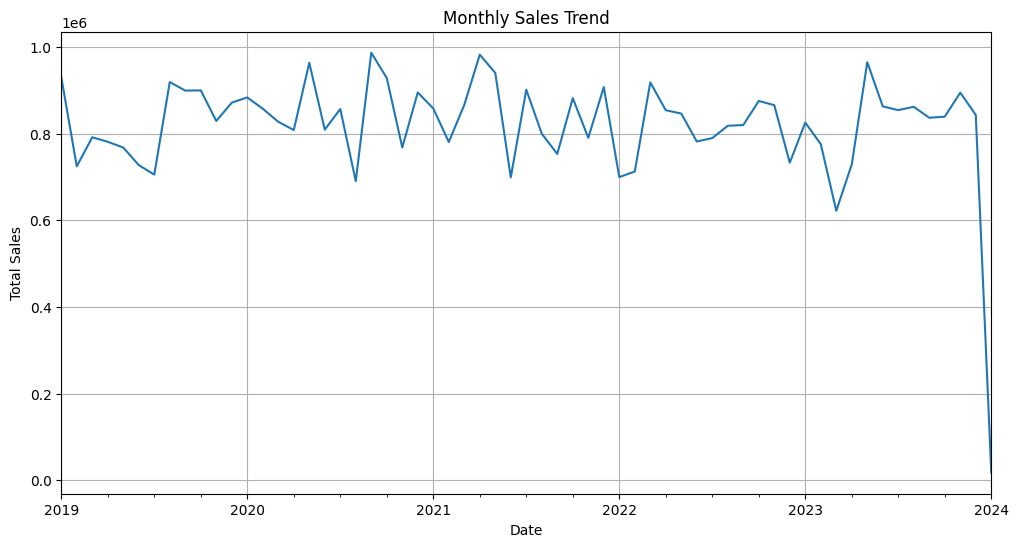

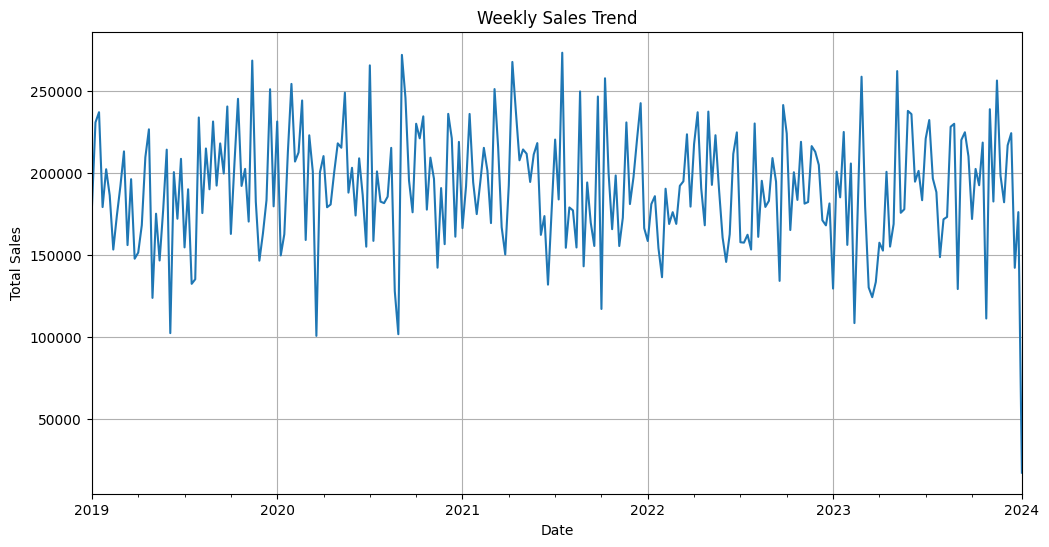

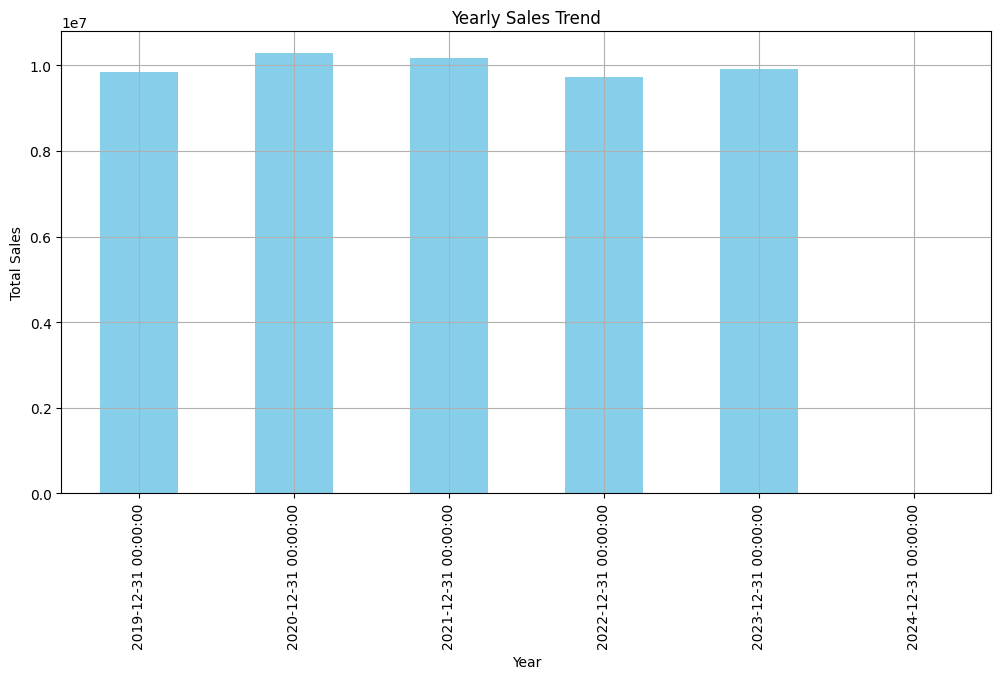

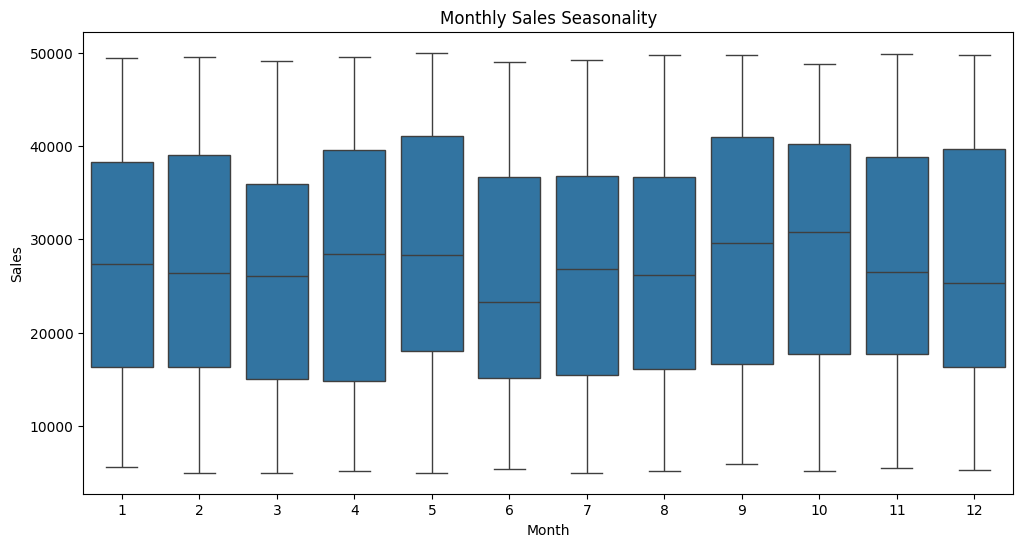

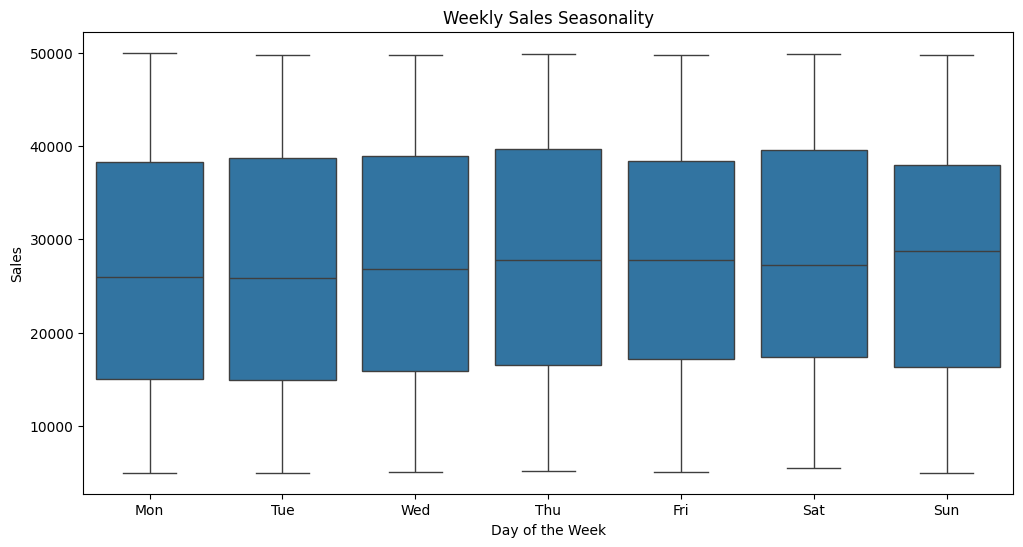

,Sales,Ad_Spend,Website_Traffic,Store_Visitors,Holiday_Flag,Discount_Percentage,Competitor_Price_Index,Weather_Impact,Economic_Index,Year,Month,Week,Day_of_Week
Date,,,,,,,,,,,,,
2019-01-01,18708.082266,10840.893932,5625,244,0,5,1.126631,-1.417261,106.062535,2019,1,1,1
2019-01-02,42443.004912,5046.856166,8510,3249,0,5,0.805544,-0.583564,93.981060,2019,1,1,2
2019-01-03,34878.657969,7676.715051,6240,2581,1,20,0.928987,-0.629330,91.509515,2019,1,1,3
2019-01-04,7545.349500,3576.804246,7429,4876,0,10,1.085589,2.987959,103.054023,2019,1,1,4
2019-01-05,31984.964392,5599.898784,6805,2963,0,0,1.042384,-3.361583,97.531615,2019,1,1,5


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. Upload and Load the Dataset
# ------------------------------

from google.colab import files
print("Please upload your time series CSV file:")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, parse_dates=['Date'])

# Display first few rows
display(df.head())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------

# Set Date as index
df.set_index('Date', inplace=True)

# Create additional time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week
df['Day_of_Week'] = df.index.dayofweek

# ------------------------------
# 3. Time Series Aggregation
# ------------------------------

# Aggregate sales data by month, week, and year
monthly_sales = df['Sales'].resample('M').sum()
weekly_sales = df['Sales'].resample('W').sum()
yearly_sales = df['Sales'].resample('Y').sum()

# ------------------------------
# 4. Data Visualization
# ------------------------------

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Plot weekly sales trend
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Plot yearly sales trend
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# ------------------------------
# 5. Seasonality Analysis
# ------------------------------

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Monthly Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_Week', y='Sales', data=df)
plt.title('Weekly Sales Seasonality')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Show processed data
display(df.head())


Please upload your CLV dataset (CSV file):


Saving customer_lifetime_value_data.csv to customer_lifetime_value_data.csv


,Customer_ID,Transaction_Date,Purchase_Amount,Customer_Age,Customer_Segment,Marketing_Channel,Discount_Applied,Repeat_Purchase_Flag
0,1005,2023-10-03,408.242947,32,New,Email,20,0
1,1091,2023-09-12,235.711892,60,Returning,Paid Ads,10,1
2,1093,2023-03-24,477.122887,68,Returning,Paid Ads,10,0
3,1038,2021-12-04,150.124492,60,Returning,Paid Ads,15,1
4,1085,2022-03-26,83.107944,51,New,Organic,10,0


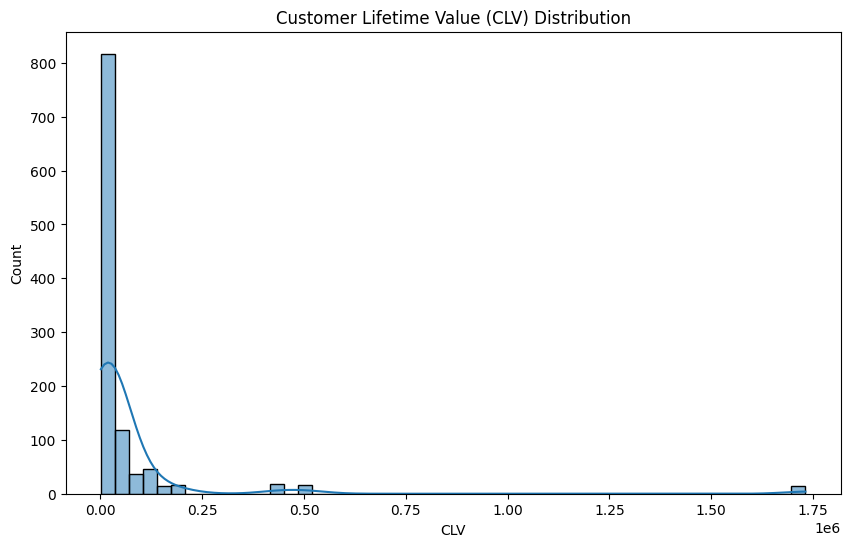

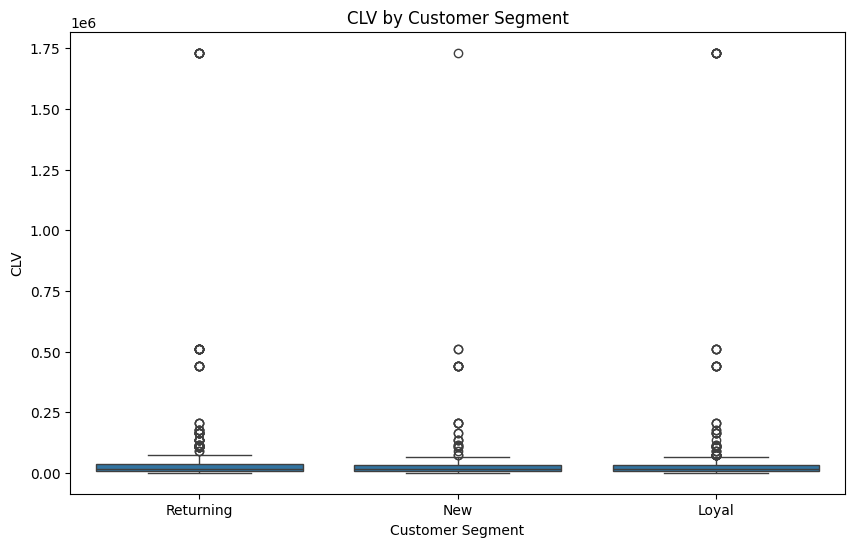

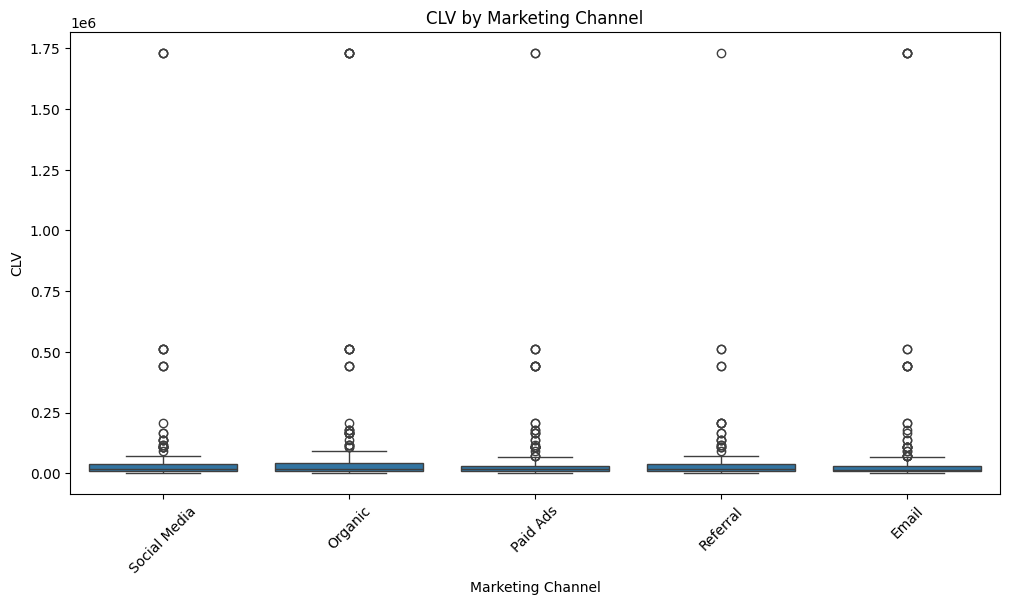

,Customer_ID,Recency,Frequency,Monetary,CLV
0,1000,7,14,258.113895,164870.250601
14,1001,116,10,271.329027,8464.538025
24,1002,240,12,248.448362,4515.368570
36,1003,148,14,288.395790,9890.620719
50,1004,9,12,249.409291,109241.269330


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ------------------------------
# 1. Upload and Load the Dataset
# ------------------------------

from google.colab import files
print("Please upload your CLV dataset (CSV file):")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, parse_dates=['Transaction_Date'])

# Display first few rows
display(df.head())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------

# Set Transaction_Date as index
df = df.sort_values(by=['Customer_ID', 'Transaction_Date'])

# Calculate Recency (days since last purchase)
latest_date = df['Transaction_Date'].max()
df['Recency'] = df.groupby('Customer_ID')['Transaction_Date'].transform(lambda x: (latest_date - x.max()).days)

# Calculate Frequency (total purchases per customer)
frequency = df.groupby('Customer_ID')['Transaction_Date'].count().reset_index()
frequency.columns = ['Customer_ID', 'Frequency']

df = df.merge(frequency, on='Customer_ID', how='left')

# Calculate Monetary Value (average purchase amount per customer)
monetary = df.groupby('Customer_ID')['Purchase_Amount'].mean().reset_index()
monetary.columns = ['Customer_ID', 'Monetary']

df = df.merge(monetary, on='Customer_ID', how='left')

# Calculate Customer Lifetime Value (CLV)
# CLV = (Monetary Value) * (Frequency) / (Recency + 1) * 365 (for yearly estimate)
df['CLV'] = (df['Monetary'] * df['Frequency']) / (df['Recency'] + 1) * 365

# ------------------------------
# 3. Data Visualization
# ------------------------------

# Distribution of CLV
plt.figure(figsize=(10, 6))
sns.histplot(df['CLV'], bins=50, kde=True)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('CLV')
plt.ylabel('Count')
plt.show()

# CLV by Customer Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Segment', y='CLV', data=df)
plt.title('CLV by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('CLV')
plt.show()

# CLV by Marketing Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marketing_Channel', y='CLV', data=df)
plt.title('CLV by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 4. Show Processed Data
# ------------------------------

display(df[['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'CLV']].drop_duplicates().head())
